In [2]:
!pip install kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
file_name='/content/dogs-vs-cats.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [6]:
from zipfile import ZipFile
file_name='/content/train.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [7]:
from zipfile import ZipFile
file_name='/content/test1.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [8]:
import os
file=os.listdir('/content/train')
print(file)

['dog.2395.jpg', 'dog.325.jpg', 'dog.5168.jpg', 'cat.2129.jpg', 'dog.5384.jpg', 'dog.2181.jpg', 'cat.10581.jpg', 'dog.783.jpg', 'dog.5144.jpg', 'dog.5159.jpg', 'dog.1007.jpg', 'dog.1008.jpg', 'dog.6659.jpg', 'cat.4847.jpg', 'dog.9454.jpg', 'cat.2432.jpg', 'dog.2912.jpg', 'dog.6514.jpg', 'cat.4801.jpg', 'cat.1160.jpg', 'dog.10849.jpg', 'cat.11870.jpg', 'dog.7519.jpg', 'dog.153.jpg', 'cat.7187.jpg', 'cat.8306.jpg', 'dog.11535.jpg', 'dog.4090.jpg', 'dog.3882.jpg', 'cat.251.jpg', 'dog.5226.jpg', 'cat.879.jpg', 'dog.9334.jpg', 'cat.10204.jpg', 'dog.11021.jpg', 'dog.5781.jpg', 'cat.135.jpg', 'dog.1894.jpg', 'cat.6573.jpg', 'cat.11881.jpg', 'cat.2531.jpg', 'dog.6726.jpg', 'dog.11137.jpg', 'cat.9158.jpg', 'dog.11803.jpg', 'cat.4902.jpg', 'cat.6921.jpg', 'cat.2024.jpg', 'cat.9657.jpg', 'cat.11794.jpg', 'dog.11109.jpg', 'cat.3369.jpg', 'cat.9310.jpg', 'cat.365.jpg', 'cat.8702.jpg', 'dog.8595.jpg', 'dog.12061.jpg', 'dog.4081.jpg', 'dog.2393.jpg', 'dog.9876.jpg', 'dog.1364.jpg', 'cat.10632.jpg', '

In [9]:

file=os.listdir('/content/train')
dog_count=0
cat_count=0
for i in file:
  name=i[0:3]
  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1
print('dog_count:', dog_count)
print('cat_count:', cat_count)


dog_count: 12500
cat_count: 12500


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as impg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

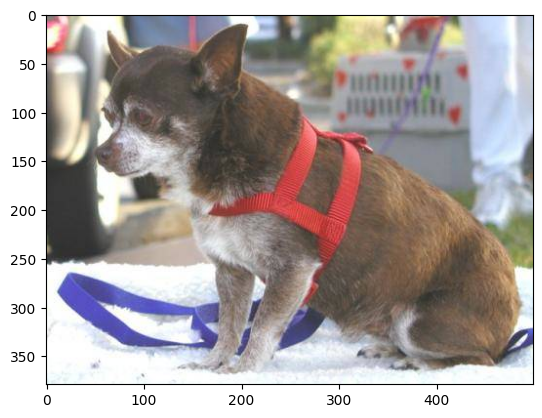

In [11]:
img=impg.imread('/content/train/dog.2395.jpg')
plot=plt.imshow(img)
plt.show()

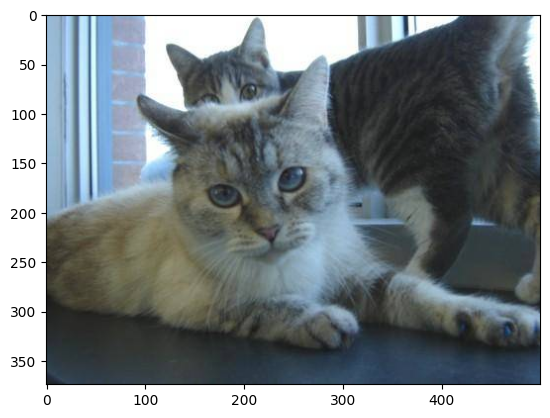

In [12]:
img=impg.imread('/content/train/cat.2129.jpg')
plot=plt.imshow(img)
plt.show()

In [13]:
original='/content/train/'
resized='/content/resized/'
for i in range(2000):
  file=os.listdir(original)[i]
  img=original+file
  img=Image.open(img)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newpath=resized+file
  img.save(newpath)


In [14]:
file=os.listdir(resized)
print(file)

['dog.2395.jpg', 'dog.325.jpg', 'dog.5168.jpg', 'cat.2129.jpg', 'dog.5384.jpg', 'dog.2181.jpg', 'cat.10581.jpg', 'dog.783.jpg', 'dog.5144.jpg', 'dog.5159.jpg', 'dog.1007.jpg', 'dog.1008.jpg', 'dog.6659.jpg', 'cat.4847.jpg', 'dog.9454.jpg', 'cat.2432.jpg', 'dog.2912.jpg', 'dog.6514.jpg', 'cat.4801.jpg', 'cat.1160.jpg', 'dog.10849.jpg', 'cat.11870.jpg', 'dog.7519.jpg', 'dog.153.jpg', 'cat.7187.jpg', 'cat.8306.jpg', 'dog.11535.jpg', 'dog.4090.jpg', 'dog.3882.jpg', 'cat.251.jpg', 'dog.5226.jpg', 'cat.879.jpg', 'dog.9334.jpg', 'cat.10204.jpg', 'dog.11021.jpg', 'dog.5781.jpg', 'cat.135.jpg', 'dog.1894.jpg', 'cat.6573.jpg', 'cat.11881.jpg', 'cat.2531.jpg', 'dog.6726.jpg', 'dog.11137.jpg', 'cat.9158.jpg', 'dog.11803.jpg', 'cat.4902.jpg', 'cat.6921.jpg', 'cat.2024.jpg', 'cat.9657.jpg', 'cat.11794.jpg', 'dog.11109.jpg', 'cat.3369.jpg', 'cat.9310.jpg', 'cat.365.jpg', 'cat.8702.jpg', 'dog.8595.jpg', 'dog.12061.jpg', 'dog.4081.jpg', 'dog.2393.jpg', 'dog.9876.jpg', 'dog.1364.jpg', 'cat.10632.jpg', '

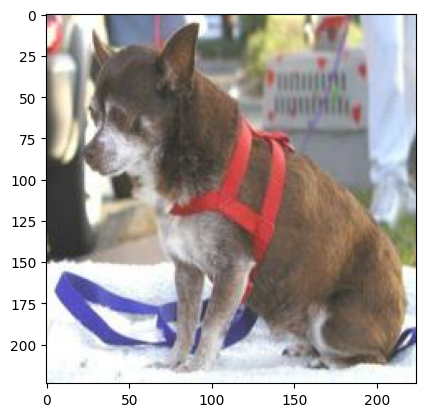

In [15]:
img=impg.imread('/content/resized/dog.2395.jpg')
plot=plt.imshow(img)
plt.show()

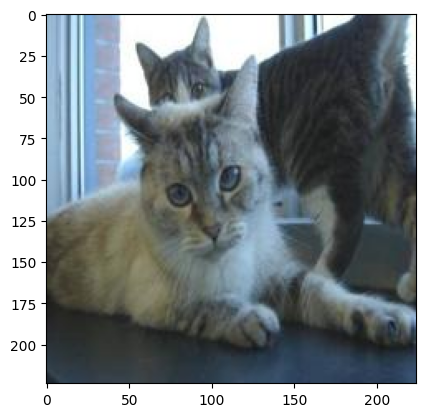

In [16]:
img=impg.imread('/content/resized/cat.2129.jpg')
plot=plt.imshow(img)
plt.show()

In [17]:
file=os.listdir('/content/train')
labels=[]
for i in range(2000):
  filename=file[i]
  label=filename[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [43]:
print(len(labels))
print(labels[0:4])
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

2000
[1, 1, 1, 0]
[0 1]
[ 989 1011]


In [19]:
import cv2
import glob

file='/content/resized/'
dir_extension=['png','jpg']
data=[]

[data.extend(glob.glob(file+'*.'+e)) for e in dir_extension]
images=np.asarray([cv2.imread(files) for files in data])

In [20]:
print(images)

[[[[130 126 131]
   [129 124 133]
   [129 123 140]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  [[133 126 141]
   [127 121 140]
   [129 120 146]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  [[134 122 158]
   [125 114 152]
   [126 114 156]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  ...

  [[238 237 227]
   [246 245 235]
   [251 250 240]
   ...
   [254 255 253]
   [255 253 252]
   [254 252 251]]

  [[241 239 229]
   [245 243 233]
   [247 245 235]
   ...
   [255 254 254]
   [255 252 253]
   [255 251 252]]

  [[251 249 239]
   [251 249 239]
   [247 245 235]
   ...
   [255 254 254]
   [255 252 253]
   [255 251 252]]]


 [[[ 61  97 107]
   [ 76 112 122]
   [ 62  94 107]
   ...
   [ 38  47  67]
   [ 74  81 100]
   [100 107 126]]

  [[ 64 100 110]
   [ 73 109 119]
   [ 66  98 111]
   ...
   [ 59  68  88]
   [ 90 100 118]
   [ 75  85 103]]

  [[ 70 106 116]
   [ 70 106 116]
   [ 69 101 114]
   ...
   [ 57  69  87]
   [ 90 102 120]
   [ 89 101

In [21]:
type(images)

numpy.ndarray

In [22]:
print(images.shape)

(2000, 224, 224, 3)


In [23]:
x=images
y=np.asarray(labels)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [26]:
x_train=x_train/255
x_test=x_test/255

In [27]:
print(x_train)

[[[[0.53333333 0.52156863 0.50588235]
   [0.5254902  0.51372549 0.49803922]
   [0.53333333 0.52156863 0.50588235]
   ...
   [0.16078431 0.16078431 0.16078431]
   [0.09019608 0.09019608 0.09019608]
   [0.04313725 0.04313725 0.04313725]]

  [[0.54509804 0.53333333 0.51764706]
   [0.5372549  0.5254902  0.50980392]
   [0.54117647 0.52941176 0.51372549]
   ...
   [0.16470588 0.16470588 0.16470588]
   [0.09411765 0.09411765 0.09411765]
   [0.04313725 0.04313725 0.04313725]]

  [[0.55294118 0.54117647 0.5254902 ]
   [0.54509804 0.53333333 0.51764706]
   [0.54509804 0.53333333 0.51764706]
   ...
   [0.17254902 0.17254902 0.17254902]
   [0.09803922 0.09803922 0.09803922]
   [0.04705882 0.04705882 0.04705882]]

  ...

  [[0.42352941 0.41960784 0.42745098]
   [0.42745098 0.42352941 0.43137255]
   [0.41960784 0.41568627 0.42352941]
   ...
   [0.16078431 0.16862745 0.16862745]
   [0.17647059 0.18431373 0.18431373]
   [0.19215686 0.2        0.2       ]]

  [[0.38823529 0.38431373 0.4       ]
   [0.4

In [28]:
!pip install tensorflow==2.15.0 tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hb
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
pretrained_model=hb.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)


In [29]:
model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(2)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [51]:
model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['acc']
)

In [52]:
model.fit(x_train, y_train,validation_split=0.2, epochs=5)

Epoch 1/5
40/40 [==============================] - 81s 2s/step - loss: 0.1677 - acc: 0.9922 - val_loss: 0.3453 - val_acc: 0.9719
Epoch 2/5
40/40 [==============================] - 76s 2s/step - loss: 0.1585 - acc: 0.9875 - val_loss: 0.2369 - val_acc: 0.9812
Epoch 3/5
40/40 [==============================] - 82s 2s/step - loss: 0.1894 - acc: 0.9953 - val_loss: 0.2954 - val_acc: 0.9750
Epoch 4/5
40/40 [==============================] - 70s 2s/step - loss: 0.2031 - acc: 0.9930 - val_loss: 0.2546 - val_acc: 0.9781
Epoch 5/5
40/40 [==============================] - 87s 2s/step - loss: 0.2004 - acc: 0.9930 - val_loss: 0.2525 - val_acc: 0.9750


In [53]:
score, acc = model.evaluate(x_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)


13/13 [==============================] - 19s 1s/step - loss: 0.2642 - acc: 0.9675
Test Loss = 0.2642444670200348
Test Accuracy = 0.9674999713897705


path of image to be predicted /content/test1/10549.jpg


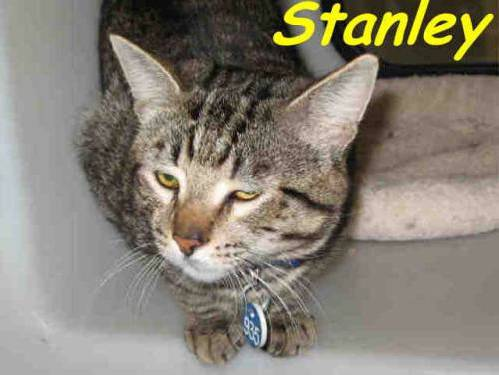

1/1 [==============================] - 0s 111ms/step
[[ 0.05075122 -8.380313  ]]
0
The image represents a Cat


In [58]:
input_image_path = input('path of image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')